Got 999999 reviews in 3.34s
test1(N=0, samples=5000): 0.00s
test1(N=0, samples=5000): 0.00s
test1(N=0, samples=5000): 0.00s
test1(N=0, samples=5000): 0.00s
test1(N=0, samples=5000): 0.00s
test1(N=0, samples=5000): 0.00s
test1(N=0, samples=5000): 0.00s
test1(N=0, samples=5000): 0.00s
test1(N=0, samples=5000): 0.00s
test1(N=0, samples=5000): 0.00s
test1(N=250, samples=5000): 0.03s
test1(N=250, samples=5000): 0.03s
test1(N=250, samples=5000): 0.03s
test1(N=250, samples=5000): 0.03s
test1(N=250, samples=5000): 0.03s
test1(N=250, samples=5000): 0.03s
test1(N=250, samples=5000): 0.03s
test1(N=250, samples=5000): 0.03s
test1(N=250, samples=5000): 0.03s
test1(N=250, samples=5000): 0.03s
test1(N=500, samples=5000): 0.05s
test1(N=500, samples=5000): 0.05s
test1(N=500, samples=5000): 0.05s
test1(N=500, samples=5000): 0.05s
test1(N=500, samples=5000): 0.05s
test1(N=500, samples=5000): 0.05s
test1(N=500, samples=5000): 0.05s
test1(N=500, samples=5000): 0.05s
test1(N=500, samples=5000): 0.05s
test1(

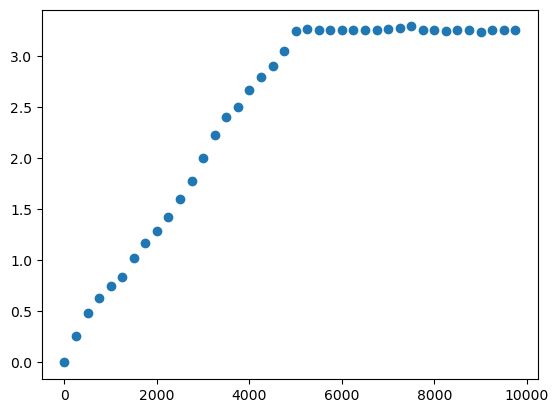

In [3]:
import json
import timeit, time
from functools import partial
from matplotlib import pyplot
import numpy as np
from pathlib import Path

DATA_FILE_FOLDER = '../data/raw/'
DATA_FILE_NAME = 'sports_and_outdoors_reviews'
DATA_FILE_TYPE = '.json'
DATA_FILE_PATH = Path(DATA_FILE_FOLDER + DATA_FILE_NAME + DATA_FILE_TYPE)

class TrieNode:
    def __init__(self):
        self.children = {}
        self.end_of_word = False
# end of class TrieNode

class Trie:
    def __init__(self):
        self.root = TrieNode() 

    def insert(self, word):
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.end_of_word = True

    def replace(self, T, t):
        words = T.split(" ")
        for i, word in enumerate(words):
            node = self.root
            for j, char in enumerate(word):
                if char not in node.children:
                    break
                node = node.children[char]
                if node.end_of_word:
                    words[i] = t.get(word, word)
                    break
        return " ".join(words)
# end of class Trie


def get_reviews_from_sports_data():    
    sports_data = []
    start = time.time()
    with open(Path(DATA_FILE_FOLDER + DATA_FILE_NAME + '_million' + DATA_FILE_TYPE), 'r') as f:
        sports_data = json.load(f)
    end = time.time()

    print(f"Got {len(sports_data)} reviews in {end - start:.2f}s")

    total_review_size = 0
    review_text = []
    for i, r in enumerate(sports_data):
        if 'reviewText' in r:
            review_text.append(r['reviewText'])

    return review_text
# end of get_reviews_from_sports_data

REVIEWS = get_reviews_from_sports_data()



def create_trie_from_text(text):
    t = Trie()
    for word in text.split(" "):
        t.insert(word)
    return t


def plotTC(fn, nMin, nMax, nInc, nTests, samples=[]):
    """
    Run timer and plot time complexity
    """
    if nMin > nMax:
        raise ValueError("nMin must be less than nMax")
    
    if nMax > len(REVIEWS):
        raise ValueError("nMax must be less than or equal to the length of the data set")

    # pick the biggest possible size if nothing is there

    if len(samples) == 0 or len(samples) > nMax:
        samples = REVIEWS[:nMax]
    
    start = time.time()
    x = []
    y = []
    for i in range(nMin, nMax, nInc):
        N = i
        testNTimer = timeit.Timer(partial(fn, N, samples))
        t = testNTimer.timeit(number=nTests)
        x.append(i)
        y.append(t)
    end = time.time()
    print(f"{end - start:.2f}s")
    p1 = pyplot.plot(x, y, 'o')
    pyplot.show()
    #pyplot.legend([p1,], [fn.__name__, ])


def test1(N, samples):
    """
    Replace words in some number of reviews from the sports data set
    """

    replacements = {
        "hello": "hi",
        "fun": "TERRIBLE",
        "how": "what",
        "are": "COSC322",
        "you": "me"
    }
    reviews_temp = samples[:N]
    start = time.time()
    for i, r in enumerate(reviews_temp):
        reviews_temp[i] = create_trie_from_text(r).replace(r, replacements)
        # print(review_text[i])
    end = time.time()
    print(f"test1(N={N}, samples={len(samples)}): {end - start:.2f}s")
    return samples[:N]


if __name__ == "__main__":


    # review_text = [x['reviewText'] for x in sports_data]
    # print(len(review_text))
    # print(review_text[0])
    # file_lines = []
    # with open('data/raw/Sports_and_Outdoors_5.json', 'r') as f:
    #     file_lines = [''.join([x.strip(), ',', '\n']) for x in f.readlines()]
    # file_lines = []
    # with open('data/raw/Sports_and_Outdoors_5.json', 'r') as f:
    #     file_lines = f.readlines()[-1000000:]

    # # # burn down my pc
    # with open('data/raw/Sports_and_Outdoors_5_2.json', 'w') as f:
    #     f.writelines(file_lines) 
    

    # don't use increment of 1
    plotTC(test1, 0, 10000, 250, 10, samples=REVIEWS[:5000])
    # print(t.search("how"))
    # T = "hello world how are you"
    # print(t.replace(T, {"hello": "hi", "world": "earth"}))